In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import iqr
from datasets import load_dataset
import seaborn as sns
sns.set_style("white")

In [46]:
from data import *
train_df, val_df, test_df = make_base_dataset()

Found cached dataset humicroedit (/home/doricirkveni/.cache/huggingface/datasets/humicroedit/subtask-1/0.0.0/209c209bc70671d8d939aefd82e51f8ff294e47504ec64ef653a93a1f13e9ed3)
100%|██████████| 4/4 [00:00<00:00, 391.31it/s]


In [47]:
df = train_df
combined_df = pd.concat([train_df, val_df, test_df])

/tmp/ipykernel_237/797185932.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(combined_df['meanGrade'], palette="flare", bins=16, cumulative=False)


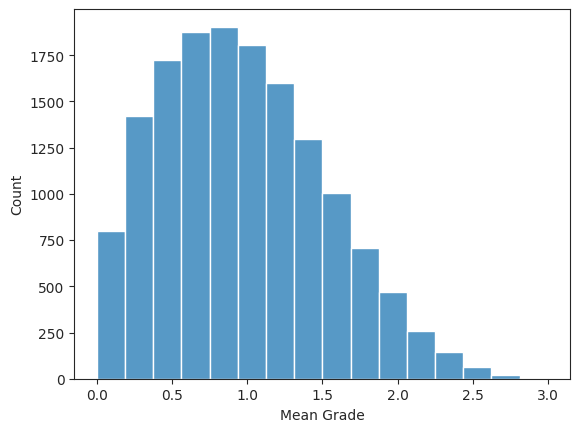

7725

In [48]:
# 1. Histogram of mean grades
sns.set_style("ticks")
sns.histplot(combined_df['meanGrade'], palette="flare", bins=16, cumulative=False)
plt.xlabel('Mean Grade')
plt.ylabel('Count')
plt.show()

len(combined_df[combined_df['meanGrade'] <= 0.9])

In [49]:
combined_df['Different votes']=combined_df['grades_max_5'].apply(lambda X:len(set(X)))

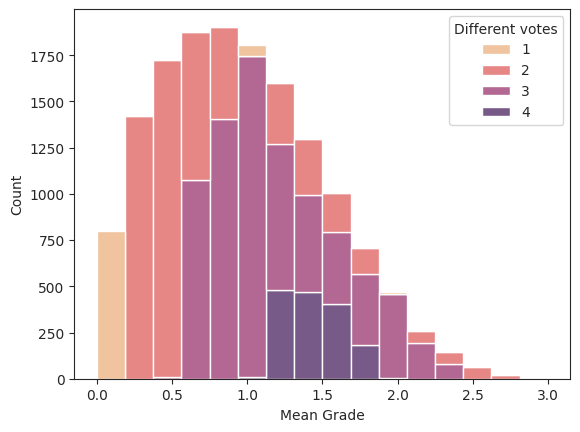

In [50]:
def plotFn(dataset,xvaluename,huename,xlabel,ylabel):
    sns.set_style("ticks")
    sns.histplot(data=dataset, x=xvaluename, hue=huename, palette="flare", bins=16, cumulative=False, multiple="stack")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()
plotFn(combined_df,'meanGrade','Different votes','Mean Grade','Count')

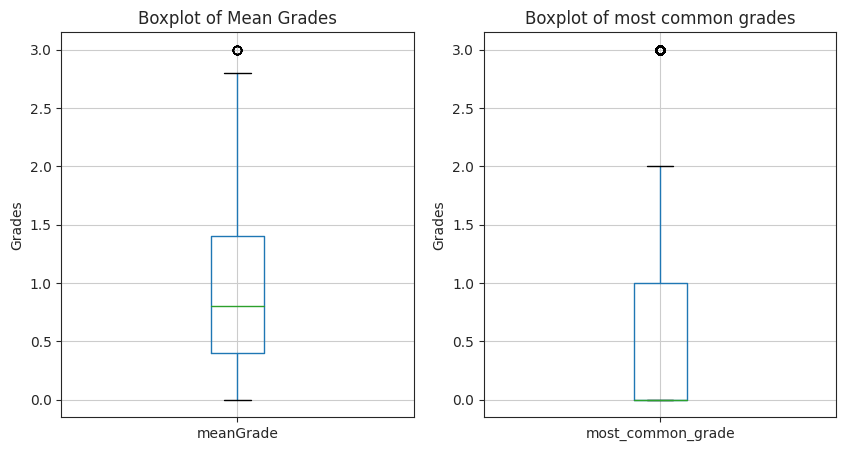

In [51]:
# Flatten the grades data
flat_data = df.explode('grades')

# Convert 'grades' to numeric
flat_data['grades'] = pd.to_numeric(flat_data['grades'])

# Boxplot of grades
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(10, 5)

flat_data.boxplot(column='meanGrade', ax=ax[0])
ax[0].set_title('Boxplot of Mean Grades')
ax[0].set_ylabel('Grades')

flat_data.boxplot(column='most_common_grade', ax=ax[1])
ax[1].set_title('Boxplot of most common grades')
ax[1].set_ylabel('Grades')
plt.show()

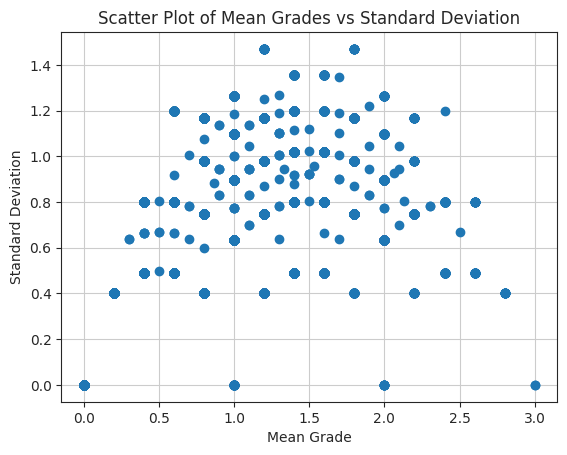

In [52]:
# 3. Scatter plot of mean grades vs standard deviation of grades
plt.scatter(df['meanGrade'], df['stddev'])
plt.title('Scatter Plot of Mean Grades vs Standard Deviation')
plt.xlabel('Mean Grade')
plt.ylabel('Standard Deviation')
plt.grid(True)
plt.show()

In [53]:
# Print 5 funniest lines
print("\n5 Funniest Lines:")
funniest = combined_df.sort_values(by='meanGrade', ascending=False).head(50)
for i, row in funniest.iterrows():
    print(f"{row['arrow_sentence']}, Mean Grade: {row['meanGrade']}")

# Print 5 least funny lines
print("\n5 Least Funny Lines:")
least_funny = combined_df.sort_values(by='meanGrade').head(50)
for i, row in least_funny.iterrows():
    print(f"{row['arrow_sentence']}, Mean Grade: {row['meanGrade']}")

# Print 5 lines with biggest variance
print("\n10 Lines With Biggest Variance:")
biggest_variance = combined_df.sort_values(by='stddev', ascending=False).head(50)
for i, row in biggest_variance.iterrows():
    print(f"{row['arrow_sentence']}, Mean: {row['meanGrade']}, Std Dev: {row['stddev']}")



5 Funniest Lines:
President Trump 's first year [ anniversary => Kindergarten ] report card , with grades from A + to F, Mean Grade: 3.0
RAF fighters intercept two Russian [ bombers => drunks ] near UK airspace | World news, Mean Grade: 3.0
Hillary Clinton Supporters Filed a Complaint Against [ Bernie Sanders => themselves ] — And Lost, Mean Grade: 3.0
Recent Scandals Highlight Trump 's Chaotic [ Management => Fashion ] Style, Mean Grade: 3.0
Trump Mocks Schumer ’s Tears ; Vows to ‘ Make America [ Safe => Insane ] Again ’, Mean Grade: 3.0
Time Asks Donald Trump to Remove Fake [ Cover => hair ] From Business Properties, Mean Grade: 2.799999952316284
Mitch McConnell thinks tax reform will take longer than Trump [ claimed => Haircut ] , Mean Grade: 2.799999952316284
What if [ Sociologists => donkeys ] Had as Much Influence as Economists ?, Mean Grade: 2.799999952316284
The last president to [ fire => kiss ] an FBI director ? Bill Clinton, Mean Grade: 2.799999952316284
Recent Scandals Hig

[-0.00146969  0.36742346  0.73484692  1.10227038  1.46969385]
['low', 'medium-low', 'medium-high', 'high']
Categories (4, object): ['low' < 'medium-low' < 'medium-high' < 'high']


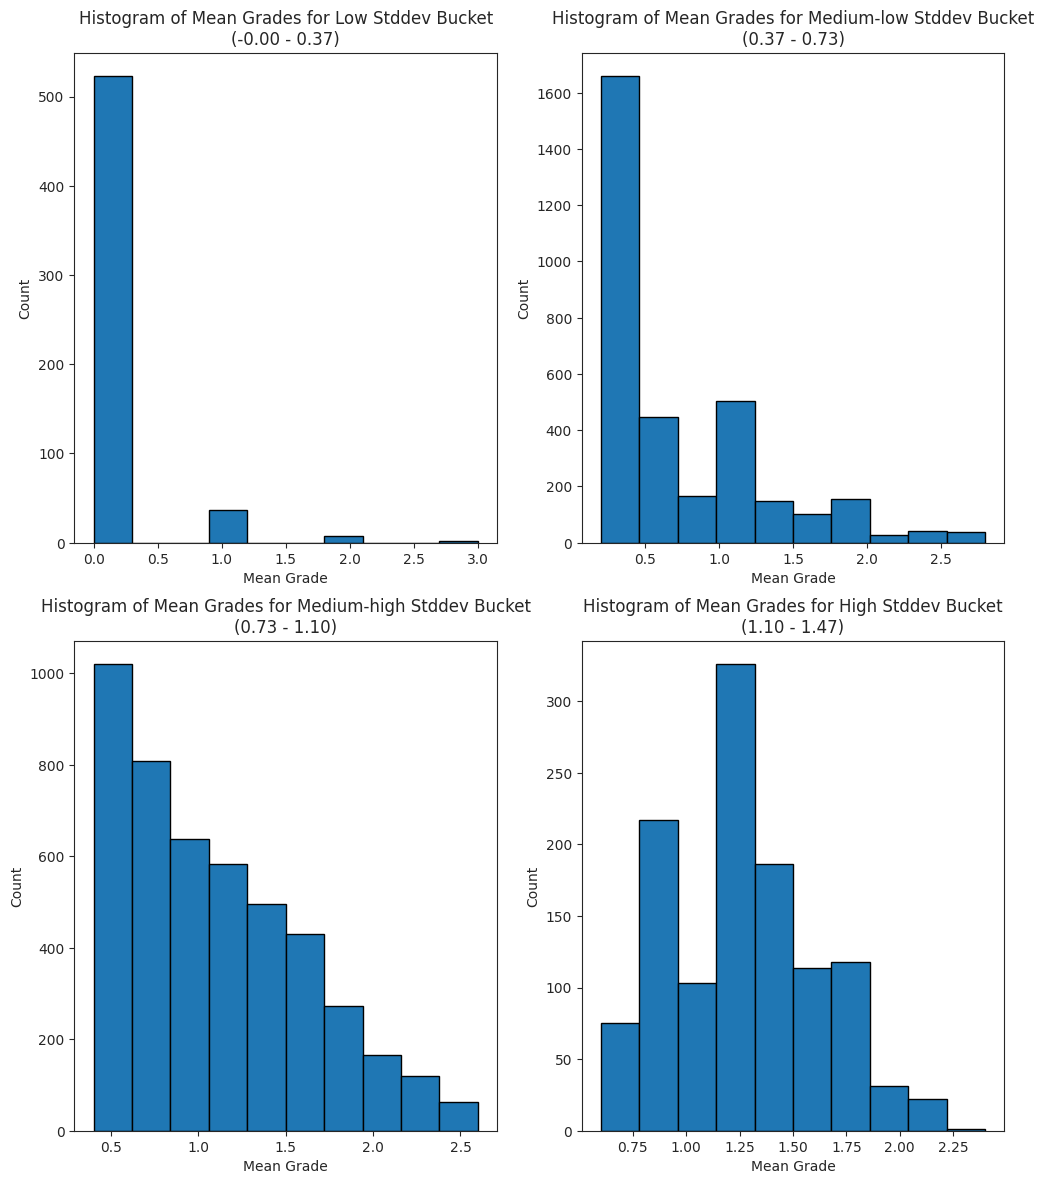

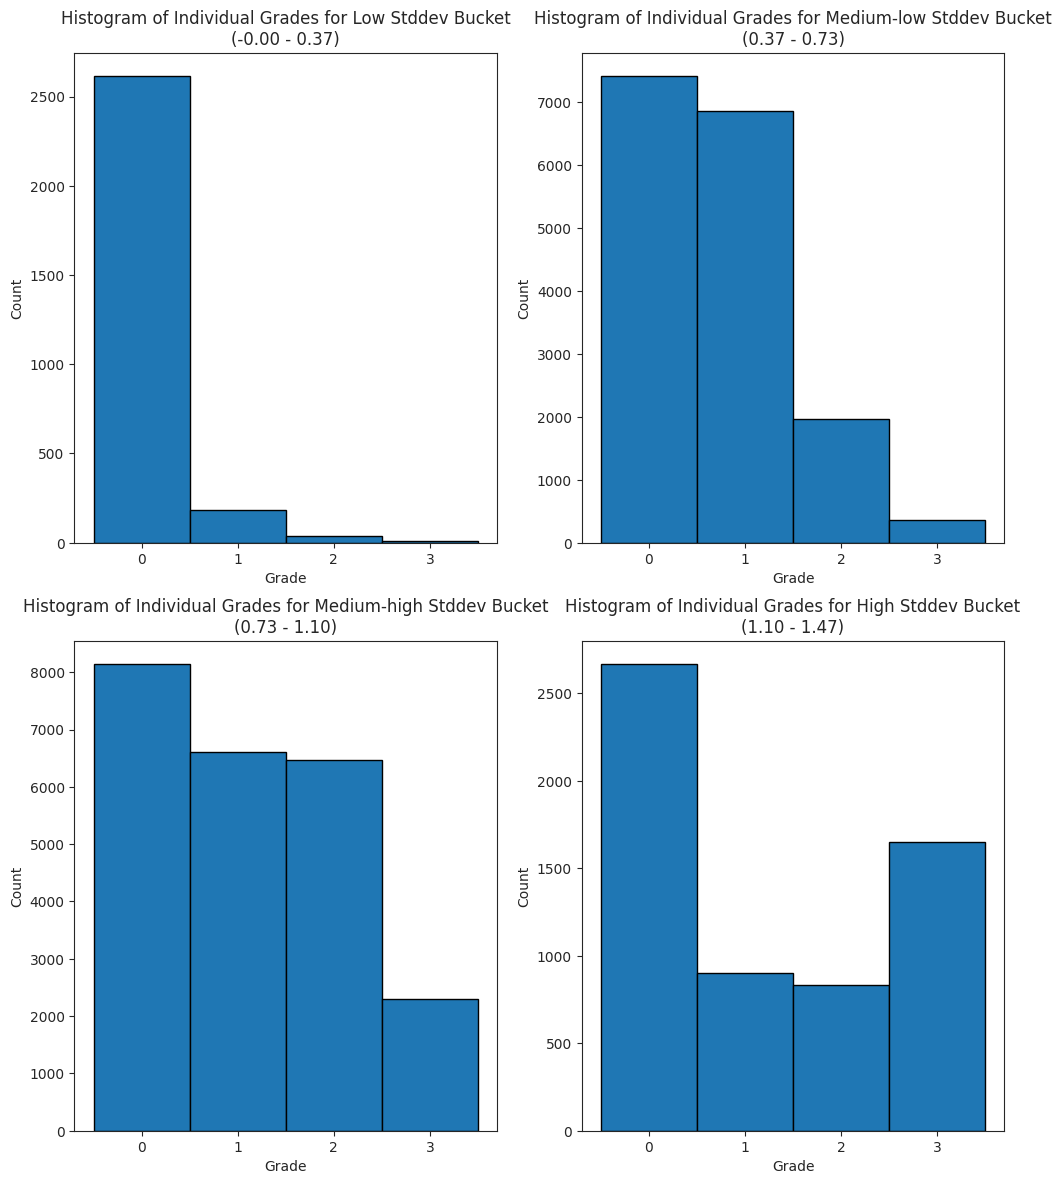

In [54]:
# 1. Bucketize stddev into 4 bins
df['stddev_bucket'], bins = pd.cut(df['stddev'], bins=4, retbins=True, labels=["low", "medium-low", "medium-high", "high"])

# Get unique labels
labels = df['stddev_bucket'].unique().sort_values()

print(bins)
print(labels)

# 2. Create a histogram of mean grades for each stddev bucket.
fig, axs = plt.subplots(2, 2, figsize=(12, 14))
i = 0
for i in range(len(labels)):
    label = labels[i]
    bin_from, bin_to = bins[i], bins[i + 1]
    axs[i // 2, i % 2].hist(df[df['stddev_bucket'] == label]['meanGrade'], bins=10, edgecolor='black')
    axs[i // 2, i % 2].set_title(f'Histogram of Mean Grades for {label.capitalize()} Stddev Bucket\n({bin_from:.2f} - {bin_to:.2f})')
    axs[i // 2, i % 2].set_xlabel('Mean Grade')
    axs[i // 2, i % 2].set_ylabel('Count')
    i += 1
plt.show()

# 3. Plot a histogram of all individual grades for rows that fall into a particular stddev bucket.
fig, axs = plt.subplots(2, 2, figsize=(12, 14))
i = 0
for i in range(len(labels)):
    label = labels[i]
    bin_from, bin_to = bins[i], bins[i + 1]
    grades_in_bucket = df[df['stddev_bucket'] == label]['grades']
    grades_in_bucket = [item for sublist in grades_in_bucket for item in sublist]  # flatten list of lists

    axs[i // 2, i % 2].hist(grades_in_bucket, bins=range(5), edgecolor='black', align='left')
    axs[i // 2, i % 2].set_title(f'Histogram of Individual Grades for {label.capitalize()} Stddev Bucket\n({bin_from:.2f} - {bin_to:.2f})')
    axs[i // 2, i % 2].set_xlabel('Grade')
    axs[i // 2, i % 2].set_ylabel('Count')
    axs[i // 2, i % 2].set_xticks(range(4))
    i += 1
plt.show()


In [55]:
import json

try:
    
    with open('train_topics_cache.json', 'r') as f:
        topics = json.load(f)
        df['topics'] = df['id'].apply(lambda id: topics[id])
except:

    from transformers import pipeline
    import torch
    torch.cuda.empty_cache()

    # Assume that these are your news headlines
    headlines = []
    for i, row in df.iterrows():
        o, e = row['original'], row['edit']
        #h = o.replace('<', '(').replace('/>', f', {e})')
        h = o
        headlines.append(h)

    # Define the topics you want to classify the headlines into
    topics = ["Business", "Science", "Health", "Politics", "Democrats", "Republicans", "Trump", "Biden", "Economy", "Sports", "Entertainment", "Technology", "Education", "World", "US", "Crime"]

    # Create a zero-shot classification pipeline
    classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli", device=0)

    # Iterate over the headlines and classify each into a topic
    df['topics'] = ''

    batch_size = 1000
    i = 0
    while i < len(headlines):
        # Make the prediction
        result = classifier(headlines[i:i+batch_size], topics)

        # Get the best matching topic
        for j, r in enumerate(result):
            scores = sorted(r['scores'])
            best_topic        = r['labels'][r['scores'].index(scores[-1])]
            second_best_topic = r['labels'][r['scores'].index(scores[-2])]
            third_best_topic  = r['labels'][r['scores'].index(scores[-3])]

            #print(f'Headline: {i+j}/{len(headlines)} "{headlines[i+j]}" \nBest Matching Topics: {best_topic}, {second_best_topic}, {third_best_topic}')
            df.at[i+j, 'topics'] = [best_topic, second_best_topic, third_best_topic]

        i += batch_size
        print(f'Finished headlines {i}/{len(headlines)}')

    topics = {}
    for i, row in df.iterrows():
        topics[row['id']] = row['topics']

    with open('train_topics_cache.txt', 'w') as f:
        json.dump(topics, f)


try:
    with open('train_edit_topics_cache.json', 'r') as f:
        topics = json.load(f)
        df['edit_topics'] = df['id'].apply(lambda id: topics[id])
except:

    from transformers import pipeline
    import torch
    torch.cuda.empty_cache()

    # Assume that these are your news headlines
    headlines = []
    for i, row in df.iterrows():
        o, e = row['original'], row['edit']
        #h = o.replace('<', '(').replace('/>', f', {e})')
        #h = o
        h = e
        headlines.append(h)

    # Define the topics you want to classify the funny words
    topics = ["sexual", "bodypart", "family", "food", "trump", "politics", "children", "clothes", "fashion", "animals" , "drugs", "silly", "places", "profession", "disease", "relationships", "aging", "money" ]

    # Create a zero-shot classification pipeline
    classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli", device=0)

    # Iterate over the headlines and classify each into a topic
    df['edit_topics'] = ''

    batch_size = 100
    i = 0
    while i < len(headlines):
        # Make the prediction
        result = classifier(headlines[i:i+batch_size], topics)

        # Get the best matching topic
        for j, r in enumerate(result):
            scores = sorted(r['scores'])
            best_topic        = r['labels'][r['scores'].index(scores[-1])]
            second_best_topic = r['labels'][r['scores'].index(scores[-2])]
            third_best_topic  = r['labels'][r['scores'].index(scores[-3])]

            print(f'Headline: {i+j}/{len(headlines)} "{headlines[i+j]}", Best Matching Topics: {best_topic}, {second_best_topic}, {third_best_topic}')
            df.at[i+j, 'edit_topics'] = [best_topic, second_best_topic, third_best_topic]

        i += batch_size
        print(f'Finished headlines {i}/{len(headlines)}')

    topics = {}
    for i, row in df.iterrows():
        topics[row['id']] = row['edit_topics']

    with open('train_edit_topics_cache.json', 'w') as f:
        json.dump(topics, f)

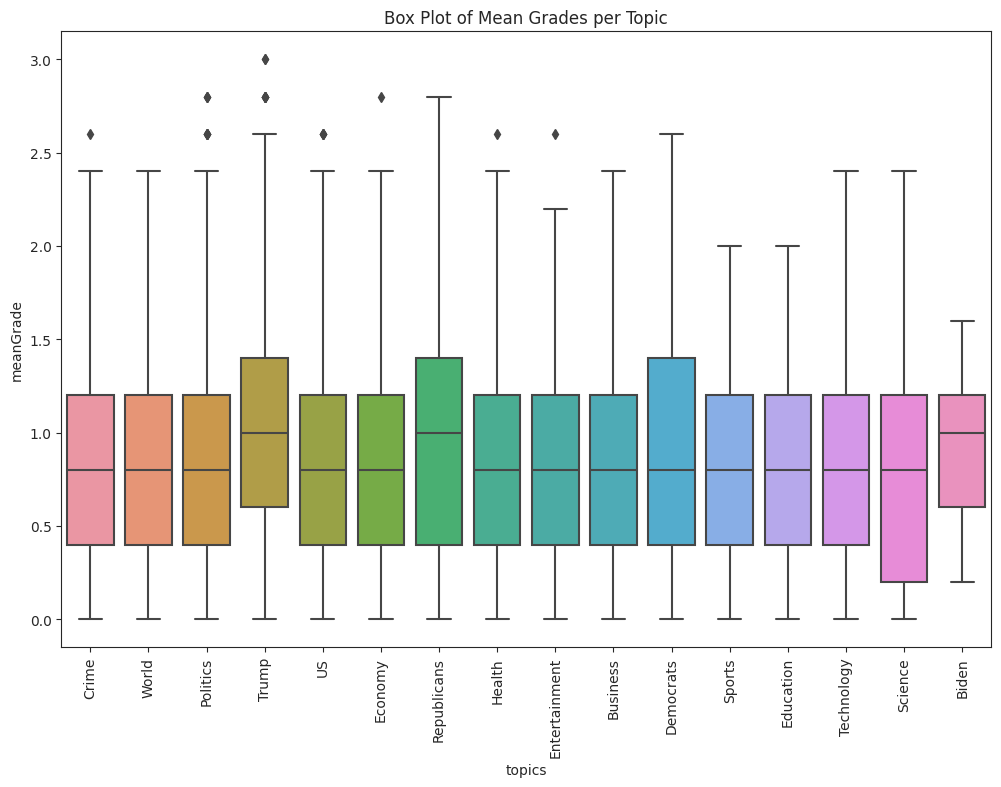

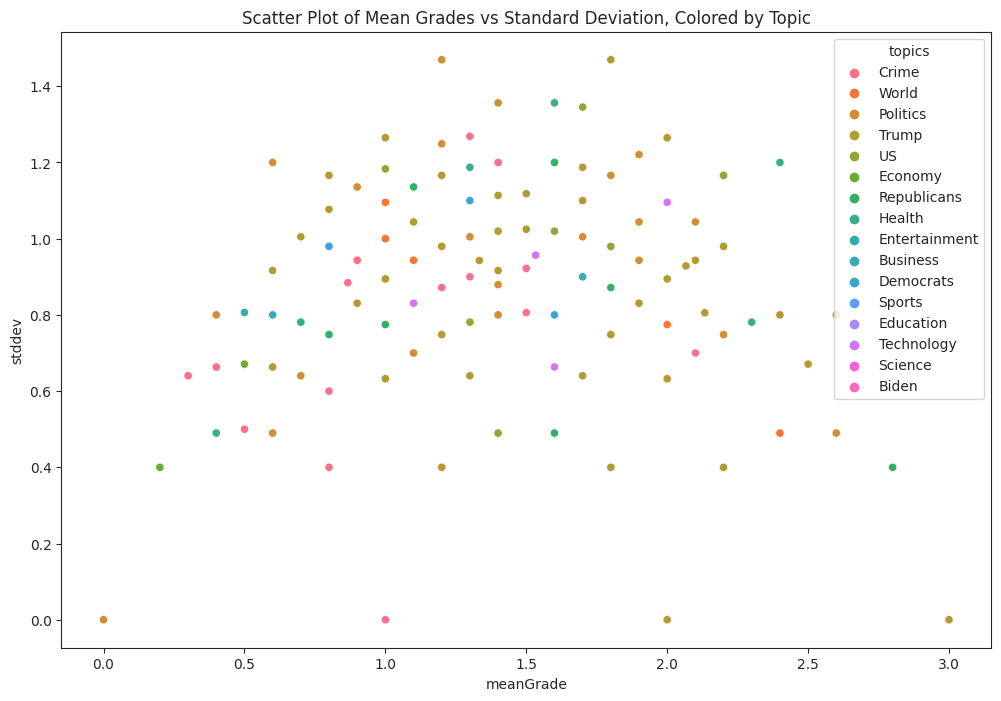

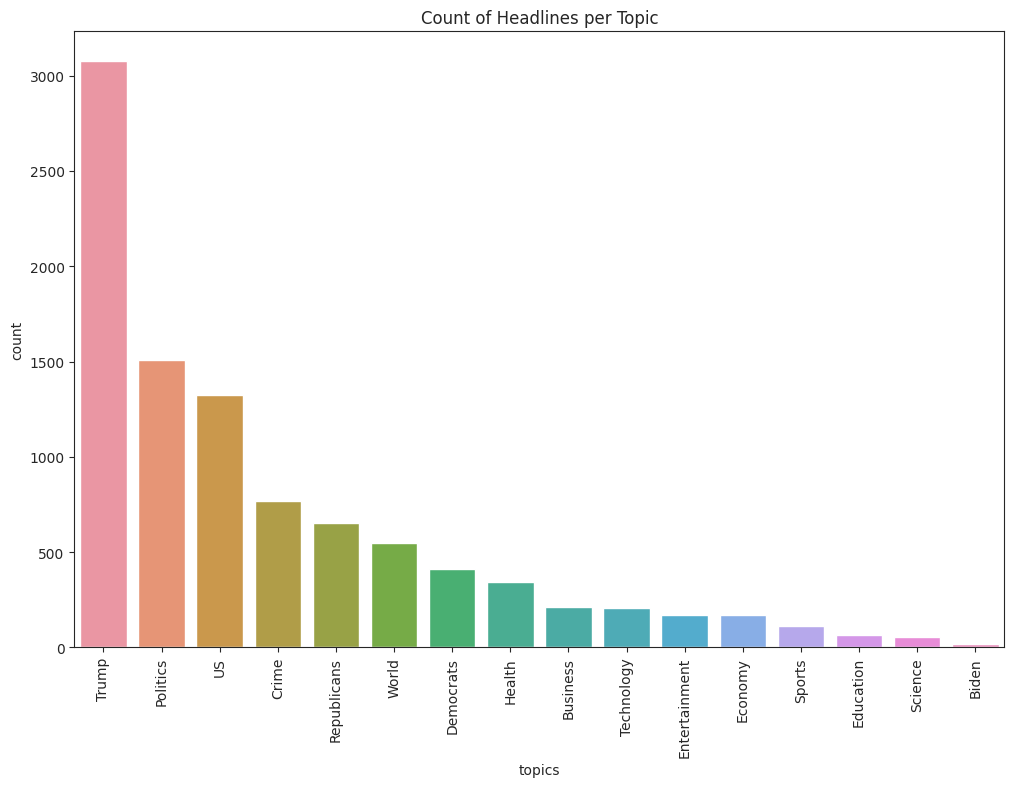

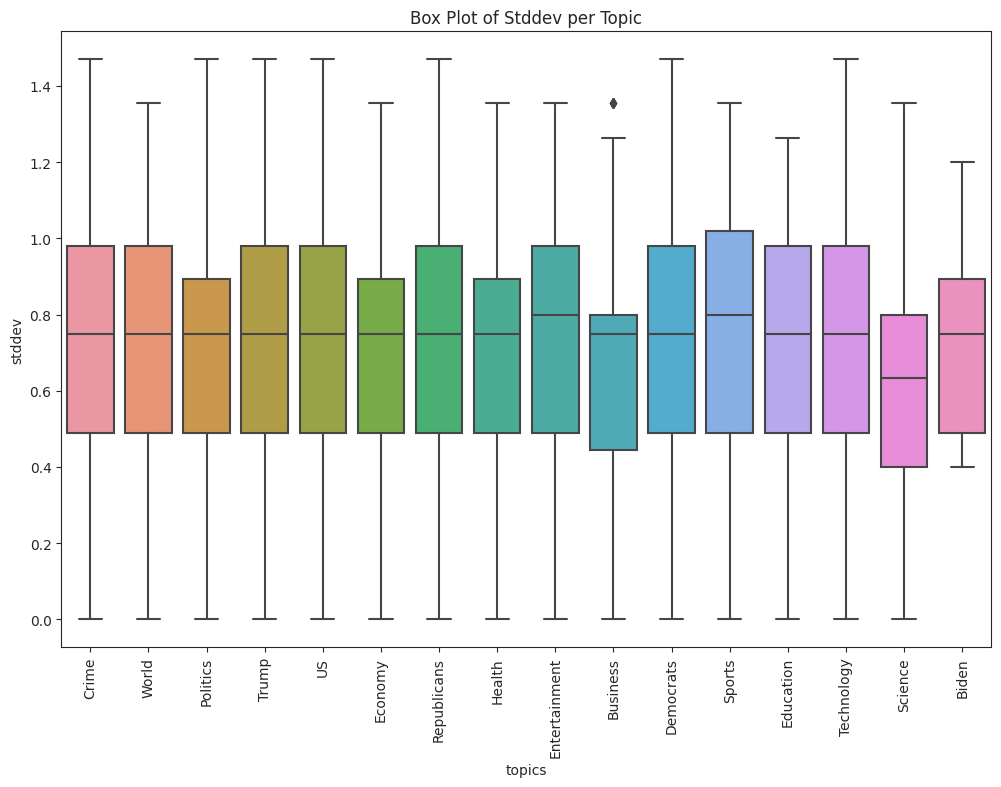

In [56]:
# Explode the dataframe on 'topics' so each topic is in a separate row
#df_exploded = df.explode('topics')
df_exploded = df.copy()
df_exploded['topics'] = df['topics'].apply(lambda ts: ts[0])

# Box plot of grades per topic
plt.figure(figsize=(12, 8))
sns.boxplot(x="topics", y="meanGrade", data=df_exploded)
plt.title('Box Plot of Mean Grades per Topic')
plt.xticks(rotation=90)
plt.show()

# Scatter plot of mean grades vs stddev, colored by topic
plt.figure(figsize=(12, 8))
sns.scatterplot(x="meanGrade", y="stddev", hue="topics", data=df_exploded)
plt.title('Scatter Plot of Mean Grades vs Standard Deviation, Colored by Topic')
plt.show()

# Two additional visualizations:
# 1. Count plot of topics
plt.figure(figsize=(12, 8))
sns.countplot(x="topics", data=df_exploded, order = df_exploded['topics'].value_counts().index)
plt.title('Count of Headlines per Topic')
plt.xticks(rotation=90)
plt.show()

# 2. Box plot of stddev per topic
plt.figure(figsize=(12, 8))
sns.boxplot(x="topics", y="stddev", data=df_exploded)
plt.title('Box Plot of Stddev per Topic')
plt.xticks(rotation=90)
plt.show()


9652


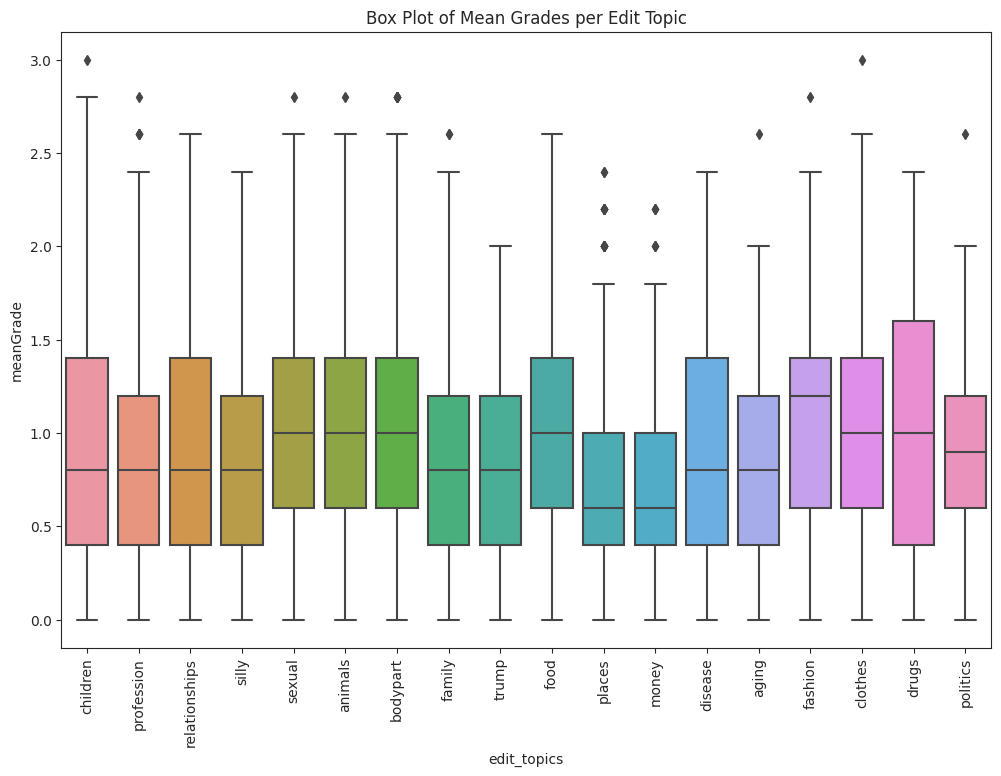

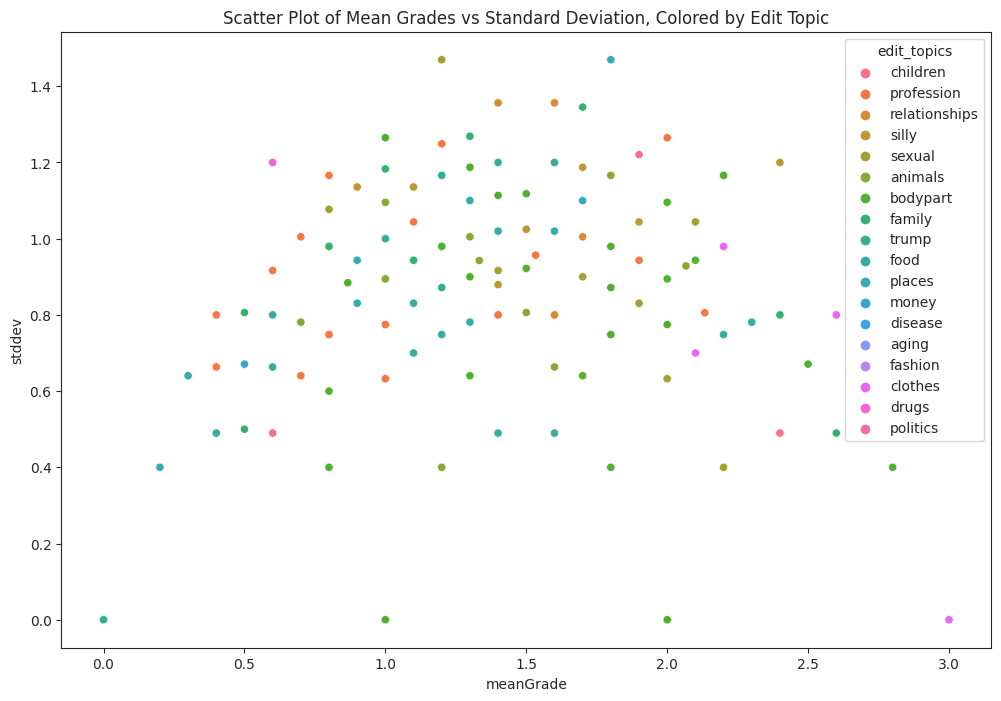

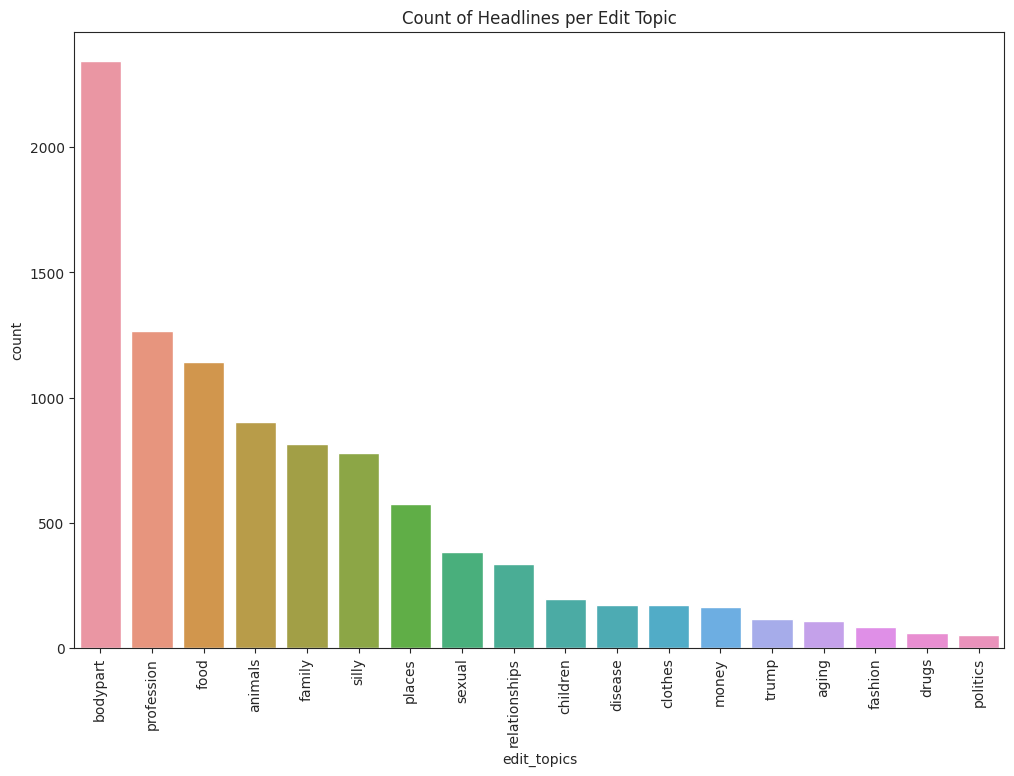

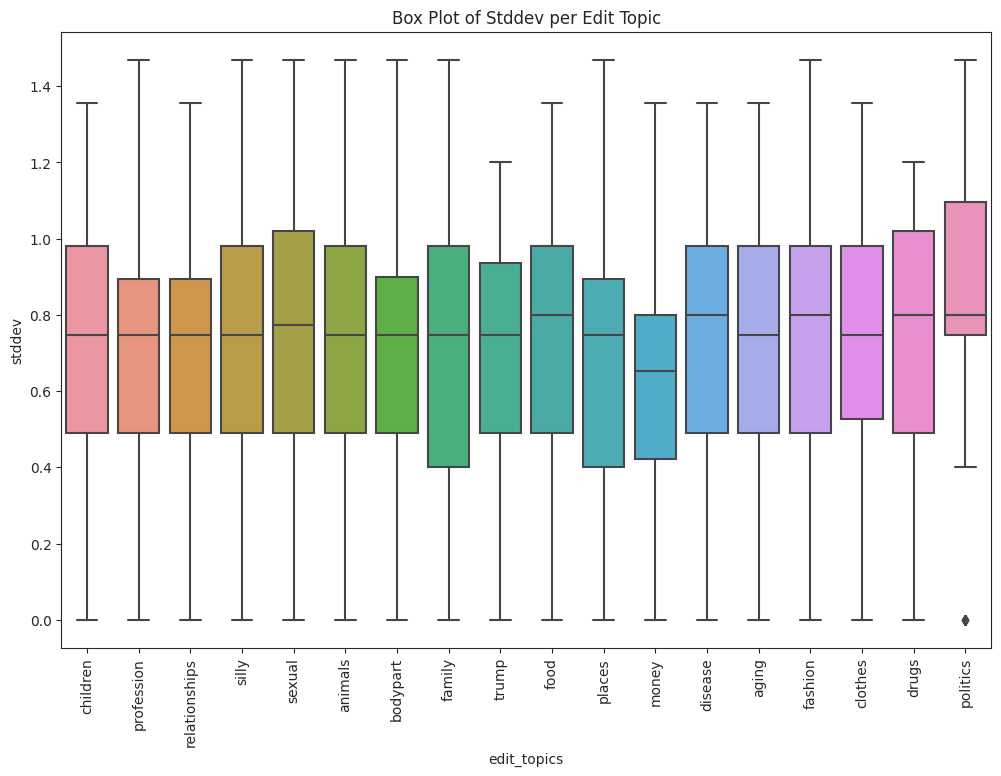

In [57]:
print(len(df.index))

# Explode the dataframe on 'topics' so each topic is in a separate row
#df_exploded = df.explode('topics')
df_edit_topics = df.copy()
df_edit_topics['edit_topics'] = df['edit_topics'].apply(lambda ts: ts[0])

# Box plot of grades per topic
plt.figure(figsize=(12, 8))
sns.boxplot(x="edit_topics", y="meanGrade", data=df_edit_topics)
plt.title('Box Plot of Mean Grades per Edit Topic')
plt.xticks(rotation=90)
plt.show()

# Scatter plot of mean grades vs stddev, colored by topic
plt.figure(figsize=(12, 8))
sns.scatterplot(x="meanGrade", y="stddev", hue="edit_topics", data=df_edit_topics)
plt.title('Scatter Plot of Mean Grades vs Standard Deviation, Colored by Edit Topic')
plt.show()

# Two additional visualizations:
# 1. Count plot of edit_topics
plt.figure(figsize=(12, 8))
sns.countplot(x="edit_topics", data=df_edit_topics, order = df_edit_topics['edit_topics'].value_counts().index)
plt.title('Count of Headlines per Edit Topic')
plt.xticks(rotation=90)
plt.show()

# 2. Box plot of stddev per topic
plt.figure(figsize=(12, 8))
sns.boxplot(x="edit_topics", y="stddev", data=df_edit_topics)
plt.title('Box Plot of Stddev per Edit Topic')
plt.xticks(rotation=90)
plt.show()


In [58]:
agreement_names = ['All Agree', 'One Disagreement', 'Two Disagreements', 'Three Disagreements']

def deconstruct_by_agreeableness(df):
    df_all_agree = df[df['disagreements'] == 0]
    df_one_disagree = df[df['disagreements'] == 1]
    df_two_disagree = df[df['disagreements'] == 2]
    df_three_disagree = df[df['disagreements'] == 3]
    assert len(df_all_agree.index) + len(df_one_disagree.index) + len(df_two_disagree.index) + len(df_three_disagree.index) == len(df.index)
    return df_all_agree, df_one_disagree, df_two_disagree, df_three_disagree

df_all_agree, df_one_disagree, df_two_disagree, df_three_disagree = deconstruct_by_agreeableness(df)

0
1
2
3


/tmp/ipykernel_237/963265126.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_agreement['topics'] = df['topics'].apply(lambda ts: ts[0])
/tmp/ipykernel_237/963265126.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_agreement['topics'] = df['topics'].apply(lambda ts: ts[0])
/tmp/ipykernel_237/963265126.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

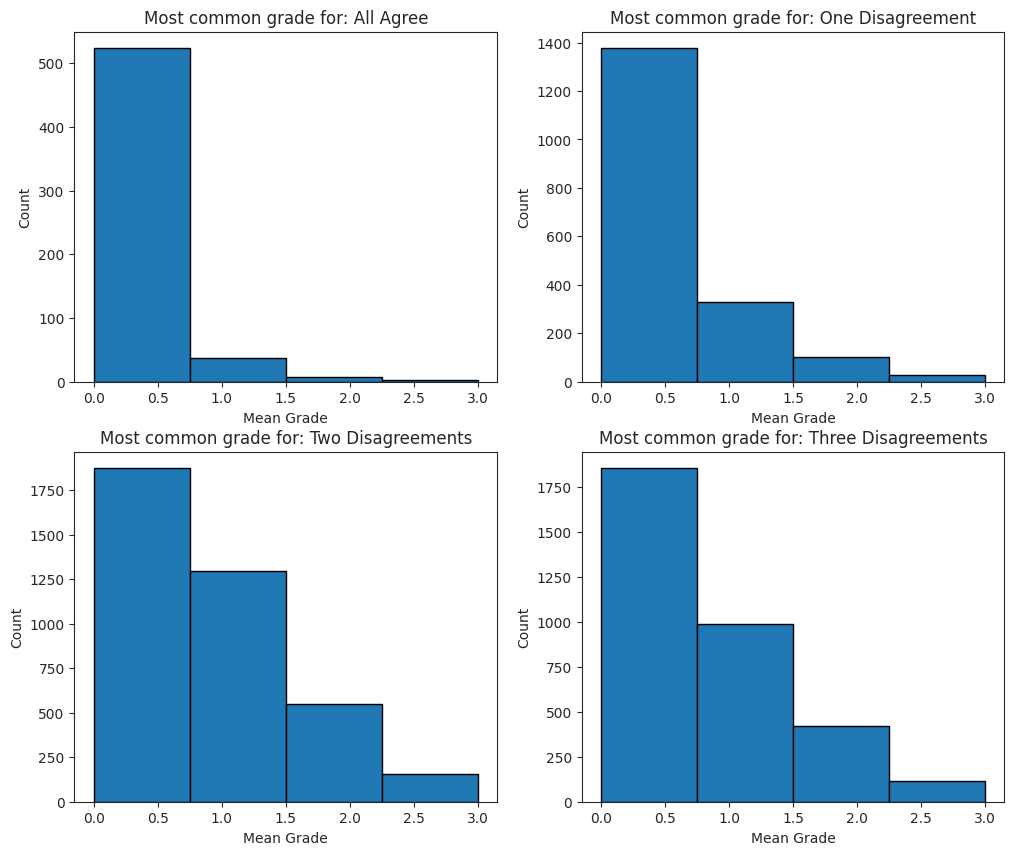

In [59]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
dfs = deconstruct_by_agreeableness(df)
for i, df_agreement in enumerate(dfs):
    print(i)
    # remove all where topic is trump
    df_agreement['topics'] = df['topics'].apply(lambda ts: ts[0])
    df_agreement = df_agreement[df_agreement['topics'] != 'trump']

    axs[i // 2, i % 2].hist(df_agreement['most_common_grade'], bins=4, edgecolor='black')
    axs[i // 2, i % 2].set_title(f"Most common grade for: {agreement_names[i]}")
    axs[i // 2, i % 2].set_xlabel('Mean Grade')
    axs[i // 2, i % 2].set_ylabel('Count')

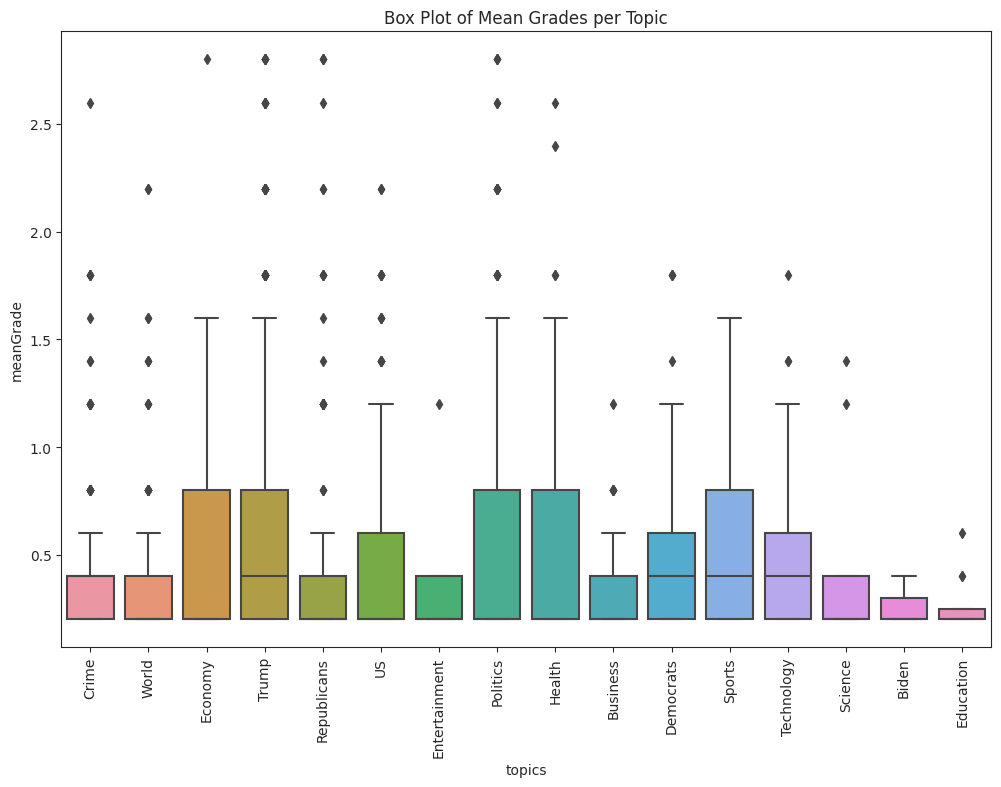

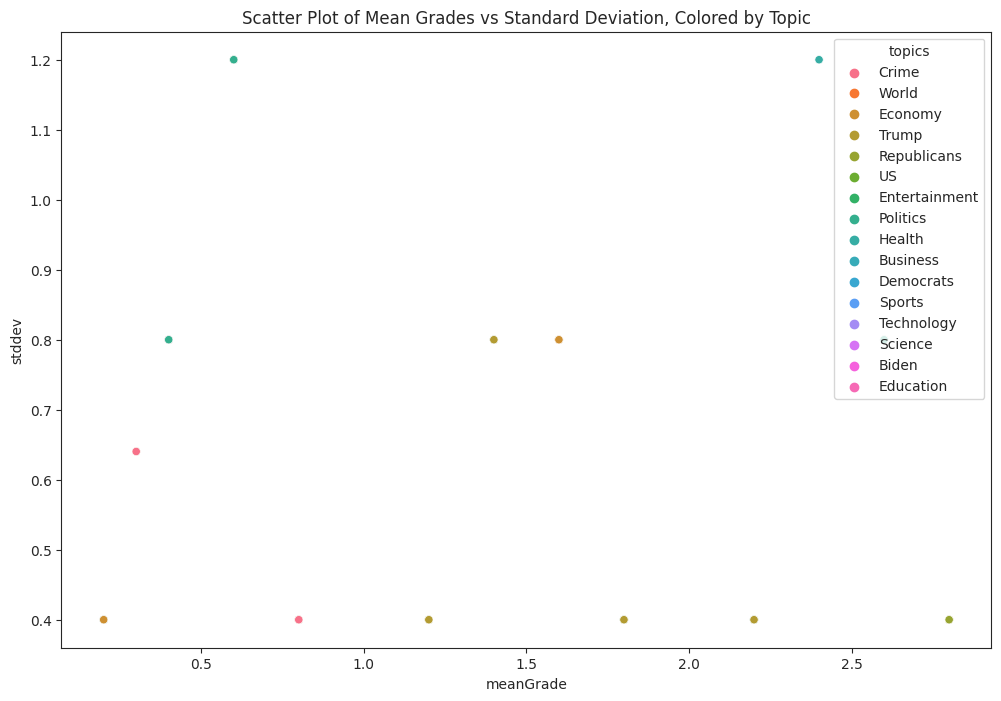

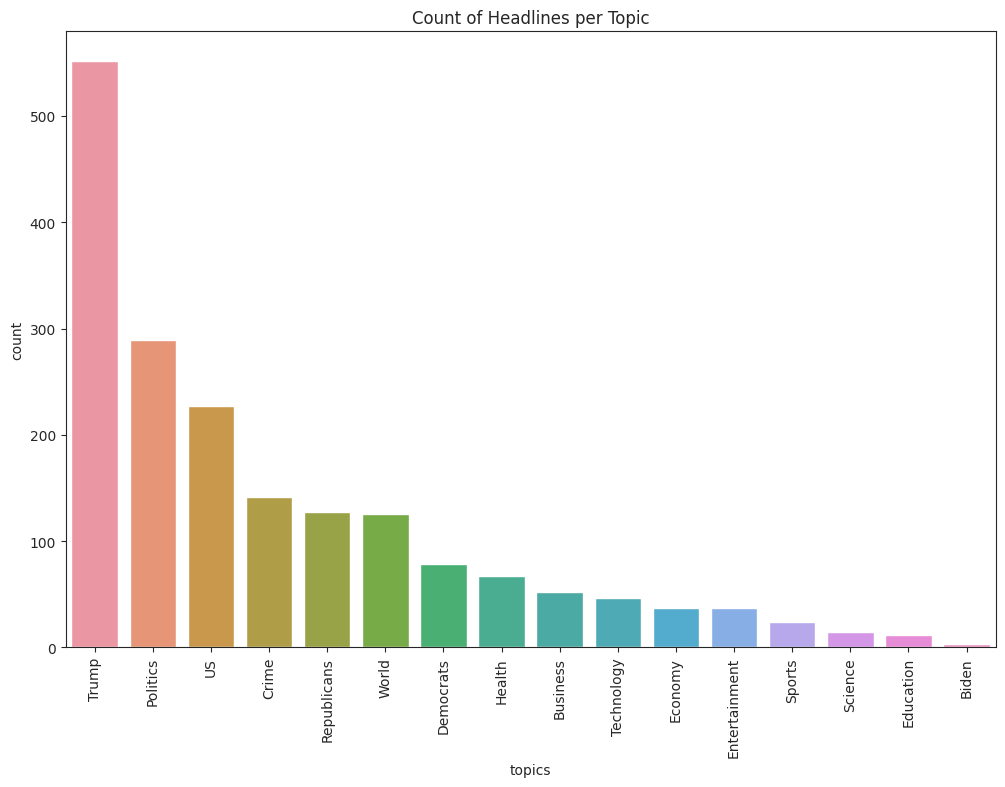

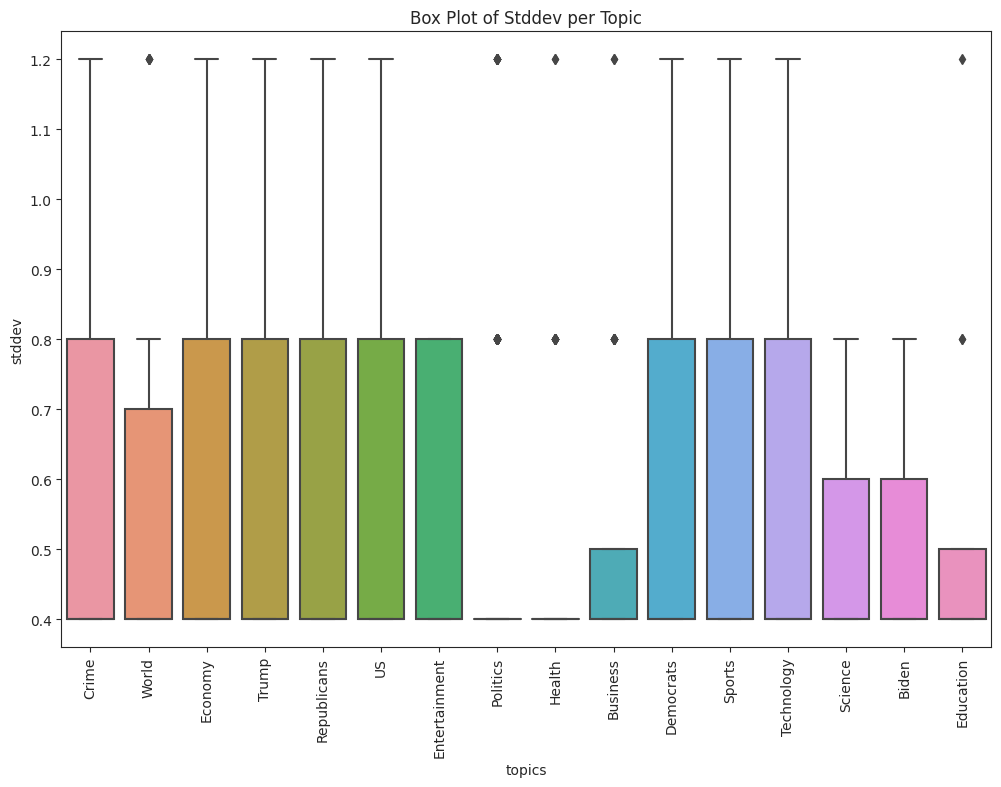

In [60]:
# Explode the dataframe on 'topics' so each topic is in a separate row
#df_exploded = df.explode('topics')
df_exploded = df_one_disagree.copy()
df_exploded['topics'] = df['topics'].apply(lambda ts: ts[0])

# for each topic, get the mean most common grade and stddev for most common grade, and set as new cols
df_exploded['most_common_grade'] = df_exploded['most_common_grade'].astype(float)
df_exploded['mean_most_common_grade'] = df_exploded.groupby('topics')['most_common_grade'].transform('mean')
df_exploded['stddev_most_common_grade'] = df_exploded.groupby('topics')['most_common_grade'].transform('std')

# Box plot of grades per topic
plt.figure(figsize=(12, 8))
sns.boxplot(x="topics", y="meanGrade", data=df_exploded)
plt.title('Box Plot of Mean Grades per Topic')
plt.xticks(rotation=90)
plt.show()

# Scatter plot of mean grades vs stddev, colored by topic
plt.figure(figsize=(12, 8))
sns.scatterplot(x="meanGrade", y="stddev", hue="topics", data=df_exploded)
plt.title('Scatter Plot of Mean Grades vs Standard Deviation, Colored by Topic')
plt.show()

# Two additional visualizations:
# 1. Count plot of topics
plt.figure(figsize=(12, 8))
sns.countplot(x="topics", data=df_exploded, order = df_exploded['topics'].value_counts().index)
plt.title('Count of Headlines per Topic')
plt.xticks(rotation=90)
plt.show()

# 2. Box plot of stddev per topic
plt.figure(figsize=(12, 8))
sns.boxplot(x="topics", y="stddev", data=df_exploded)
plt.title('Box Plot of Stddev per Topic')
plt.xticks(rotation=90)
plt.show()

Adding all my custom functions and stuff here

In [61]:
combined_df['5_mean']=combined_df['grades_max_5'].apply(np.mean)

In [62]:
def get_grade_groups(dataset,colname='grades_max_5'):
    gradecount=dict()
    for e in dataset[colname]:
        f=tuple(e)
        n=gradecount.get(f,0)
        gradecount[f]=n+1
    return gradecount
def counter_dict(iL,D=dict(),ro=-1):
    for el in iL:
        if ro<0:
            elm=el
        else:
            elm = round(el,ro)
        val=D.get(elm,0)
        D[elm]=val+1
    return D

def get_common_words(dataset):
    gradecount=dict()
    for index,row in df.iterrows():
        E=row['edited_sentence'].split()
        F=row['original'].split()
        E+=[e[1:][:-2] for e in F if e not in E]
        counter_dict(E,gradecount)
    return gradecount
def descending_common(D,n=0):
    X=[(v,e) for (e,v) in D.items()]
    X.sort(reverse=True)
    return X if n==0 else X[:n]

In [63]:
common_words_dict=get_common_words(combined_df)
descending_common(common_words_dict,10),[common_words_dict.get(e) for e in ["Biden","Trump","Obama","Bush","Clinton"]]

([(3585, 'Trump'),
  (2866, 'to'),
  (2818, "'"),
  (2340, ','),
  (1821, ':'),
  (1696, 'in'),
  (1581, 'the'),
  (1533, "'s"),
  (1512, 'of'),
  (1095, 'for')],
 [18, 3585, 157, 18, 127])

In [64]:
def avg(X):
    if len(X)==0:
        return 0
    return sum(X)/len(X)
def group_annotator_scores(occurence_dict:dict,grouping=[0,0,1,2,2],resolver=avg):
    n=max(grouping)+1
    newdict=dict()
    for key,amount in occurence_dict.items():
        values=[list() for i in range(n)]
        for i in range(len(key)):
            if key[i]<0:
                continue
            values[grouping[i]].append(key[i])
        newkey=tuple([resolver(E)for E in values])
        current=newdict.get(newkey,0)
        newdict[newkey]=current+amount
    return newdict
group_annotator_scores({(1,10,100,1000,10000):43})

{(5.5, 100.0, 5500.0): 43}

In [65]:
grade_groups=get_grade_groups(df)
print(len(grade_groups))
print(grade_groups)

56
{(0, 0, 0, 0, 1): 928, (0, 1, 1, 3, 3): 74, (0, 0, 1, 2, 2): 408, (0, 0, 0, 0, 2): 373, (0, 0, 0, 0, 0): 523, (0, 0, 2, 2, 2): 78, (0, 0, 1, 2, 3): 321, (0, 1, 1, 1, 2): 385, (0, 1, 1, 1, 1): 164, (0, 0, 1, 3, 3): 66, (0, 0, 1, 1, 1): 441, (0, 0, 1, 1, 2): 661, (1, 1, 2, 2, 2): 101, (0, 1, 1, 2, 3): 295, (0, 1, 1, 2, 2): 349, (1, 1, 1, 2, 2): 149, (0, 1, 2, 2, 2): 146, (0, 0, 0, 1, 3): 220, (0, 0, 0, 2, 2): 148, (0, 0, 0, 1, 2): 658, (1, 1, 1, 1, 3): 50, (1, 1, 1, 1, 1): 37, (0, 0, 0, 1, 1): 726, (0, 0, 2, 3, 3): 42, (1, 1, 1, 3, 3): 29, (0, 0, 0, 2, 3): 102, (2, 2, 2, 2, 3): 27, (1, 1, 1, 1, 2): 117, (0, 0, 2, 2, 3): 127, (1, 1, 2, 3, 3): 104, (0, 2, 2, 2, 3): 74, (1, 1, 2, 2, 3): 164, (0, 0, 1, 1, 3): 228, (0, 1, 3, 3, 3): 30, (0, 2, 3, 3, 3): 22, (0, 1, 2, 2, 3): 254, (2, 2, 2, 3, 3): 42, (0, 2, 2, 2, 2): 30, (0, 2, 2, 3, 3): 62, (0, 1, 1, 1, 3): 149, (1, 1, 1, 2, 3): 142, (0, 1, 2, 3, 3): 113, (0, 0, 0, 0, 3): 75, (1, 2, 2, 3, 3): 105, (1, 2, 3, 3, 3): 52, (1, 2, 2, 2, 3): 109, 

In [66]:
grade_groups_3=group_annotator_scores(grade_groups,resolver=avg)
print(len(grade_groups_3))
print(grade_groups_3)

44
{(0.0, 0.0, 0.5): 928, (0.5, 1.0, 3.0): 74, (0.0, 1.0, 2.0): 636, (0.0, 0.0, 1.0): 1099, (0.0, 0.0, 0.0): 523, (0.0, 2.0, 2.0): 78, (0.0, 1.0, 2.5): 321, (0.5, 1.0, 1.5): 385, (0.5, 1.0, 1.0): 164, (0.0, 1.0, 3.0): 66, (0.0, 1.0, 1.0): 441, (0.0, 1.0, 1.5): 661, (1.0, 2.0, 2.0): 131, (0.5, 1.0, 2.5): 295, (0.5, 1.0, 2.0): 498, (1.0, 1.0, 2.0): 199, (0.5, 2.0, 2.0): 146, (0.0, 0.0, 2.0): 368, (0.0, 0.0, 1.5): 733, (1.0, 1.0, 1.0): 37, (0.0, 2.0, 3.0): 42, (1.0, 1.0, 3.0): 29, (0.0, 0.0, 2.5): 102, (2.0, 2.0, 2.5): 27, (1.0, 1.0, 1.5): 117, (0.0, 2.0, 2.5): 127, (1.0, 2.0, 3.0): 166, (1.0, 2.0, 2.5): 238, (0.5, 3.0, 3.0): 30, (1.0, 3.0, 3.0): 38, (0.5, 2.0, 2.5): 254, (2.0, 2.0, 3.0): 42, (1.0, 1.0, 2.5): 142, (0.5, 2.0, 3.0): 113, (1.5, 2.0, 3.0): 105, (1.5, 3.0, 3.0): 53, (1.5, 2.0, 2.5): 109, (1.5, 2.0, 2.0): 46, (2.0, 3.0, 3.0): 38, (0.0, 0.0, 3.0): 19, (2.5, 3.0, 3.0): 13, (3.0, 3.0, 3.0): 2, (2.0, 2.0, 2.0): 8, (0.0, 3.0, 3.0): 9}


In [67]:
grade_groups_1=group_annotator_scores(grade_groups,[0,0,0,0,0],resolver=avg)
print(len(grade_groups_1))
print(grade_groups_1)

16
{(0.2,): 928, (1.6,): 643, (1.0,): 1160, (0.4,): 1099, (0.0,): 523, (1.2,): 1033, (0.8,): 1193, (1.4,): 833, (0.6,): 1174, (1.8,): 435, (2.2,): 170, (2.0,): 313, (2.4,): 95, (2.6,): 38, (2.8,): 13, (3.0,): 2}


We're going to make a custom grade generator:

In [68]:
def GenerateCustomGrader(weights=[1,2,3,4,5],top_grade=3):
    saved_weights=weights[:]
    bottom_weights=[min(e,0) for e in weights]
    top_weights=[max(e,0) for e in weights]
    minval=sum(bottom_weights)
    maxval=sum(top_weights)
    if minval==maxval:
        return lambda X:0
    a=1/(maxval-minval)
    xm=0-minval*top_grade
    print(minval, maxval)
    def CustomGrader(X):
        if len(X)!=len(saved_weights):
            raise Exception("Bad weights size! {} vs {}".format(X,saved_weights))
        x=xm
        for i in range(len(X)):
            x+=X[i]*saved_weights[i]
        x*=a
        return x
    print(saved_weights,a,'?')
    return CustomGrader
def ApplyCustomGrader(df,grader,oldname,newname):
    return pd.DataFrame({newname: df[oldname].apply(grader)})
CG_test=GenerateCustomGrader([-2,-1,0,1,2])
for E in [(0,0,0,0,0),(3,3,3,3,3),(0,0,0,3,3),(3,3,0,0,0)]:
    print(E,CG_test(E))

-3 3
[-2, -1, 0, 1, 2] 0.16666666666666666 ?
(0, 0, 0, 0, 0) 1.5
(3, 3, 3, 3, 3) 1.5
(0, 0, 0, 3, 3) 3.0
(3, 3, 0, 0, 0) 0.0


In [69]:
def DisplayGradeset():
    sns.set_style("ticks")
    sns.histplot(combined_df['meanGrade'], palette="flare", bins=16, cumulative=False)
    plt.xlabel('Mean Grade')
    plt.ylabel('Count')
    plt.show()

    len(combined_df[combined_df['meanGrade'] <= 0.9])

In [70]:
def CheckGradeCount(dataset,grade_column='grades'):
    D=dict()
    k=0
    for e in dataset[grade_column]:
        n=len(e)
        v=D.get(n,0)
        D[n]=v+1
    return D
CheckGradeCount(combined_df)
df[df['grades'].apply(lambda X:len(X)!=5)].head(1)

,id,original,edit,grades,meanGrade,mean_grade_bucket,normalized_score,all_scores,all_scores_normalized,original_sentence,...,edited_word_end_idx,arrow_sentence,stddev,iqr,grades_max_5,disagreements,most_common_grade,stddev_bucket,topics,edit_topics
28,2426,<Roseanne Barr/> quits Twitter after offendin...,Everyone,"[0, 0, 0, 0, 0, 1, 1, 1, 2, 3]",0.8,1.0,0.266667,"[0, 0, 0, 0, 0, 1, 1, 1, 2, 3]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.3333333333333333, ...",Roseanne Barr quits Twitter after offending w...,...,9,[ Roseanne Barr => Everyone ] quits Twitter a...,0.979796,1.0,"[0, 0, 0, 1, 3]",2,0,medium-high,"[World, US, Politics]","[family, places, bodypart]"


In [71]:
def display_uneven_bars(grades_dict,surface_value=False,title="Untitled",xtitle="Bins",ytitle="Frequency",roundable=3,plotr=plt,printout=False):
    L=[(e,v) for (e,v) in grades_dict.items()]
    L.sort()
    limits=[]
    last=L[0][0]
    n=len(L)
    for (e,_) in L:
        limits.append(round((last+e)/2,roundable))
        last=e
    limits.append(round(L[-1][0],roundable))
    widths=[round(limits[i]-limits[i-1],roundable) for i in range(1,n+1)]
    data=[v for (_,v) in L]
    if printout:
        print(L)
        print(limits)
        print(widths)
        print(data)
    surface_data= []
    last=limits[0]
    for i in range(n):
        diff=limits[i+1]-last
        if diff==0:
            surface_data.append(0)
        else:
            surface_data.append(data[i]/diff)
        last=limits[i+1]
    plotr.bar(limits[:-1], surface_data if surface_value else data, width=widths, align='edge')
    if plotr==plt:
        plotr.xlabel(xtitle)
        plotr.ylabel(ytitle)
        plt.title(title)
        plt.show()
    else: #TODO
        plotr.set_title(title)
        plotr.set_xlabel(xtitle)
        plotr.set_ylabel(ytitle)
def display_twin_subplots(grades_dict,title="Untitled",xtitle="Bins",normal_ytitle="Frequency",dense_ytitle="Density",roundable=3,plotr=plt,printout=False):
    fig, (ax1, ax2) = plotr.subplots(1, 2, figsize=(12, 7))
    display_uneven_bars(grades_dict,False,title,xtitle,normal_ytitle,roundable,ax1,printout=printout)
    plt.title(title)
    display_uneven_bars(grades_dict,True,title,xtitle,dense_ytitle,roundable,ax2,printout=printout)
    plt.show()

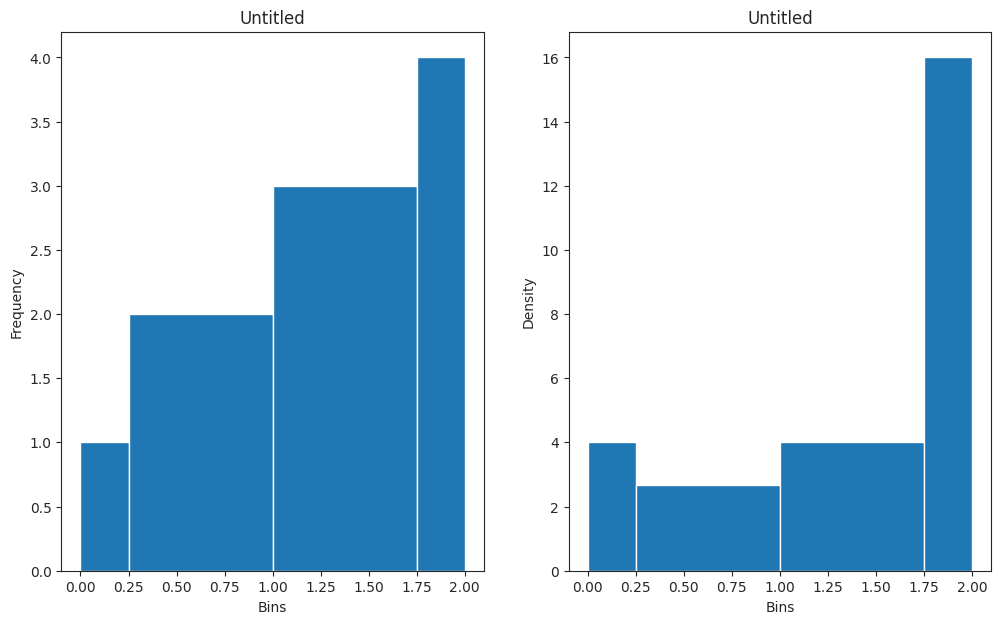

In [72]:
display_twin_subplots({0:1,0.5:2,1.5:3,2:4})

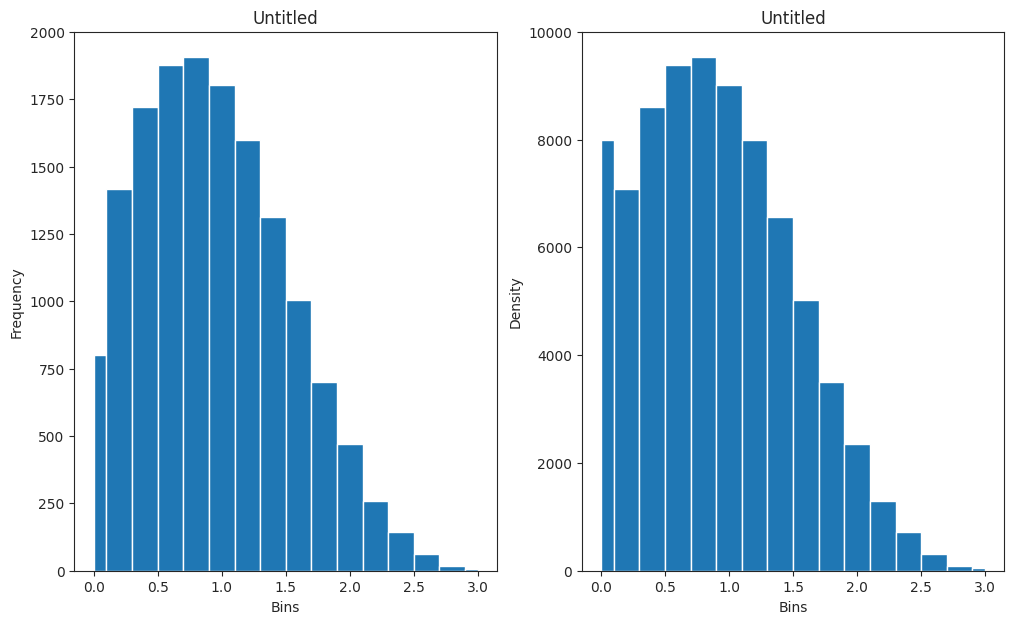

In [73]:
X=counter_dict(combined_df['5_mean'],dict(),3)
display_twin_subplots(X)

0 15
[1, 2, 3, 4, 5] 0.06666666666666667 ?


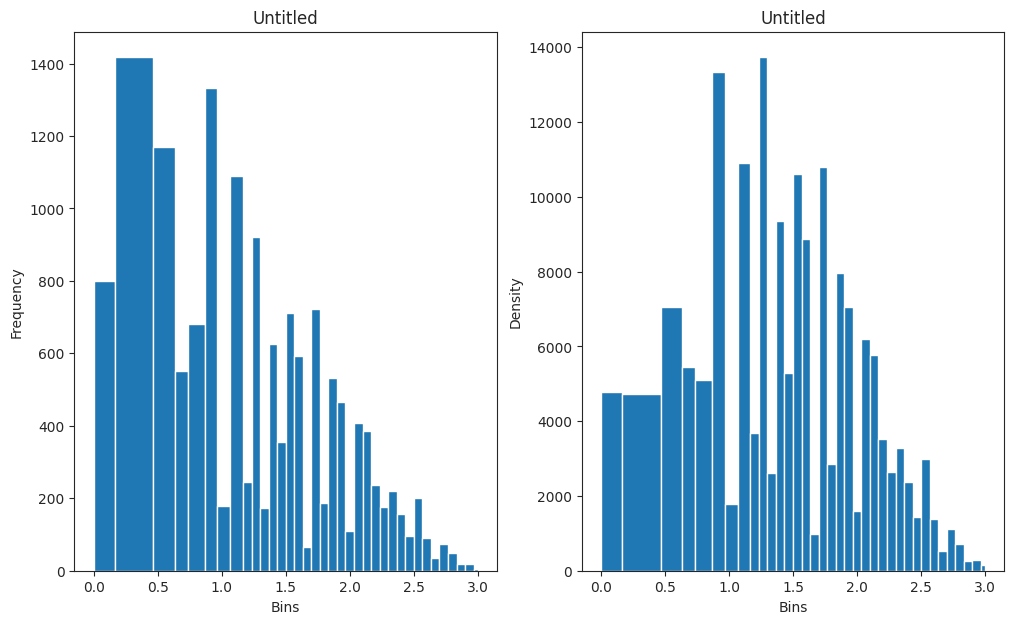

56

In [74]:
example_grader=GenerateCustomGrader()
example_grades=ApplyCustomGrader(combined_df,example_grader,'grades_max_5','grades_custom')
X=counter_dict(example_grades['grades_custom'],dict(),3)
display_twin_subplots(X)
len(get_grade_groups(combined_df,'grades_max_5'))

In [75]:
def reghist(L,name):
    sns.set_style("ticks")
    sns.histplot(L, palette="flare", bins=8, cumulative=False)
    plt.xlabel(name)
    plt.ylabel('Count')
    plt.show()

/tmp/ipykernel_237/2841596056.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(L, palette="flare", bins=8, cumulative=False)


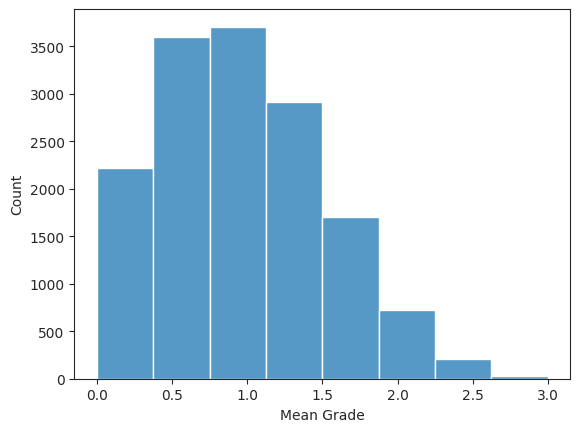

In [76]:
reghist(combined_df['5_mean'],"Mean Grade")

/tmp/ipykernel_237/2841596056.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(L, palette="flare", bins=8, cumulative=False)


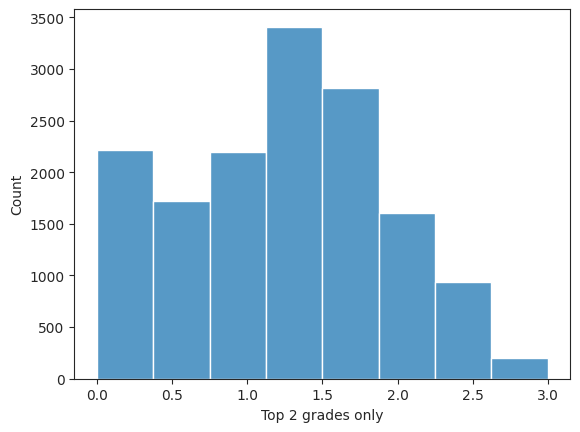

In [77]:

reghist(example_grades['grades_custom'],"Top 2 grades only")